<a href="https://colab.research.google.com/github/moganakumaran/Complete-Python-3-Bootcamp/blob/master/Feature_Selection_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Use the Hotel Booking dataset which is shared already as the data
2. Run GINI Index on the variables & prepare the plot for the same.
3. Repeat Step 2 with Normalized variables (Based on our previous session's understanding)
4. Use custom code to filter variables that are greater than mean value of GINI (Include all the input variable's average)
5. For Categoric variables, use Binning as a practice

In [2]:
from sklearn import datasets
from sklearn import metrics
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
hotel=pd.read_csv('hotel_bookings1.csv')

In [0]:
hotel=hotel.iloc[:,[0,1,12,13,14,15]]

In [0]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
hotel['hotel'] = label_encoder.fit_transform(hotel['hotel'])
hotel['meal'] = label_encoder.fit_transform(hotel['meal'])
hotel['country'] = hotel['country'].astype(str)
hotel['country'] = label_encoder.fit_transform(hotel['country'])
hotel['distribution_channel'] = hotel['distribution_channel'].astype(str)
hotel['distribution_channel'] = label_encoder.fit_transform(hotel['distribution_channel'])
hotel['market_segment'] = hotel['market_segment'].astype(str)
hotel['market_segment'] = label_encoder.fit_transform(hotel['market_segment'])

In [0]:
#hotel.drop(['arrival_date_month','reserved_room_type','assigned_room_type','deposit_type','reservation_status','reservation_status_date'],axis=1,inplace=True)

#hotel.drop(['customer_type'],axis=1,inplace=True)

In [0]:
hotel.dropna(axis=0,inplace=True)

In [8]:
hotel.describe()

,hotel,is_canceled,meal,country,market_segment,distribution_channel
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.335539,0.370416,0.555742,93.333462,4.928101,2.585317
std,0.472181,0.482918,1.068598,44.905967,1.266726,0.907578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,56.000000,4.000000,3.000000
50%,0.000000,0.000000,0.000000,81.000000,5.000000,3.000000
75%,1.000000,1.000000,0.000000,135.000000,6.000000,3.000000
max,1.000000,1.000000,4.000000,177.000000,7.000000,4.000000


In [9]:
hotel.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   hotel                 119390 non-null  int64
 1   is_canceled           119390 non-null  int64
 2   meal                  119390 non-null  int64
 3   country               119390 non-null  int64
 4   market_segment        119390 non-null  int64
 5   distribution_channel  119390 non-null  int64
dtypes: int64(6)
memory usage: 6.4 MB


In [0]:
X = hotel.drop('is_canceled',axis=1)
y = hotel['is_canceled']

In [36]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,1,342,2015,27,1,0,0,2,0.0,0,0,41,3,1,0,0,0,3,NaN,NaN,0,0.0,0,0
1,1,737,2015,27,1,0,0,2,0.0,0,0,41,3,1,0,0,0,4,NaN,NaN,0,0.0,0,0
2,1,7,2015,27,1,0,1,1,0.0,0,0,133,3,1,0,0,0,0,NaN,NaN,0,75.0,0,0
3,1,13,2015,27,1,0,1,1,0.0,0,0,133,2,0,0,0,0,0,304.0,NaN,0,75.0,0,0
4,1,14,2015,27,1,0,2,2,0.0,0,0,133,6,3,0,0,0,0,240.0,NaN,0,98.0,0,1


In [11]:
from sklearn.tree import DecisionTreeClassifier 

clf_entropy = DecisionTreeClassifier( 
            criterion = "gini", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 

clf_entropy.fit(X, y) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [12]:
print(clf_entropy.feature_importances_)

[0.01077773 0.         0.40436421 0.58485806 0.        ]


In [13]:
p_values = pd.Series(clf_entropy.feature_importances_,index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

market_segment          0.584858
country                 0.404364
hotel                   0.010778
distribution_channel    0.000000
meal                    0.000000
dtype: float64

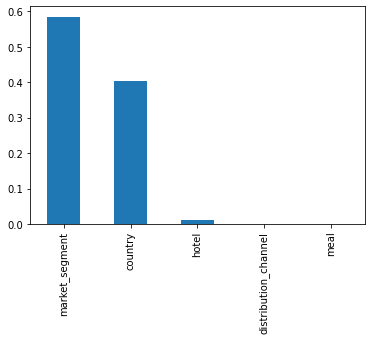

In [14]:
p_values.plot.bar()

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler=StandardScaler()

In [17]:
scaler.fit_transform(X)

array([[ 1.40722407, -0.52006829,  0.92786584, -1.52212079, -1.74676299],
       [ 1.40722407, -0.52006829,  0.92786584, -1.52212079, -1.74676299],
       [ 1.40722407, -0.52006829, -0.76456667, -1.52212079, -1.74676299],
       ...,
       [-0.71061889, -0.52006829, -1.12086825,  0.84620013,  0.45691357],
       [-0.71061889, -0.52006829, -0.76456667,  0.84620013,  0.45691357],
       [-0.71061889,  1.3515505 , -1.12086825,  0.84620013,  0.45691357]])

In [18]:
from sklearn.tree import DecisionTreeClassifier 

clf_entropy_n = DecisionTreeClassifier( 
            criterion = "gini", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 

clf_entropy_n.fit(X, y) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [19]:
print(clf_entropy_n.feature_importances_)

[0.01077773 0.         0.40436421 0.58485806 0.        ]


In [20]:
p_values_n = pd.Series(clf_entropy_n.feature_importances_,index = X.columns)
p_values_n.sort_values(ascending = False , inplace = True)
p_values_n

market_segment          0.584858
country                 0.404364
hotel                   0.010778
distribution_channel    0.000000
meal                    0.000000
dtype: float64

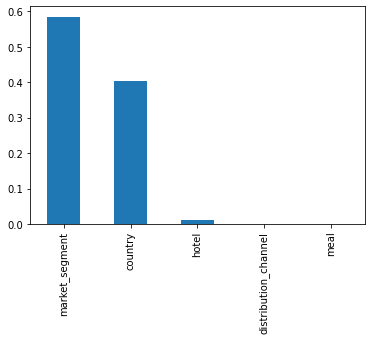

In [21]:
p_values.plot.bar()

In [22]:

from sklearn.feature_selection import SelectFromModel
# Finally selecting the most important features
sfm = SelectFromModel(clf_entropy_n, threshold=0.40)
sfm.fit(X, y)



SelectFromModel(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=5,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 presort='deprecated',
                                                 random_state=100,
                                                 splitter='best'),
                max_features=None, norm_order=1, prefit=False, threshold=0.4)

In [23]:
for feature_list_index in sfm.get_support(indices=True):
    print(hotel.index[feature_list_index])


2
3
